<a href="https://colab.research.google.com/github/yunyeong-choi/2022fin/blob/master/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%9C%BC%EB%A1%9C%20%EB%B0%B0%EC%9A%B0%EB%8A%94%20%EC%8B%A4%EC%A0%84%20%EA%B8%88%EC%9C%B5%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D(%ED%80%80%ED%8A%B8)/11%EA%B0%95_FinanceDataReader_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

20221003

In [1]:
# COLAB 환경을 위한 나눔고딕 한글폰트 설치  --> 진행 후,  런타임 > 런타임 다시 시작을 해 주세요. 다시 시작 후에는 이 부분 실행 X
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,194 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [1]:
# matplotlib 임포트,  주피터 출력설정,  한글 글꼴 지정
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.family'] = 'NanumBarunGothic'  # (Colab 용) 한글 출력을 위한 글꼴 설정

##### 주식 데이터를 크롤링할 수 있는 FinanceDataReader 설치

In [2]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### 라이브러리 임포트

In [3]:
import FinanceDataReader as fdr
import pandas as pd
from tqdm.notebook import tqdm

### 1. 거래소 별 전 종목 리스트 받아오기

In [4]:
# 한국 시장: KOSPI, KOSDAQ
kospi_list = fdr.StockListing('KOSPI')
kosdaq_list = fdr.StockListing('KOSDAQ')

In [5]:
kospi_list

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
6,152100,KOSPI,ARIRANG 200,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7,295820,KOSPI,ARIRANG 200동일가중,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8,253150,KOSPI,ARIRANG 200선물레버리지,NaN,NaN,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
8027,435540,KOSPI,히어로즈 TDF2040액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8028,435550,KOSPI,히어로즈 TDF2050액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8029,437550,KOSPI,히어로즈 글로벌리츠이지스액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8030,419890,KOSPI,히어로즈 단기채권ESG액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [6]:
type(kospi_list)

pandas.core.frame.DataFrame

In [7]:
kosdaq_list

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
5,211270,KOSDAQ,AP위성,통신 및 방송 장비 제조업,위성통신 단말기,2016-03-04,12월,류장수,http://www.apsi.co.kr,서울특별시
63,032790,KOSDAQ,BNGT,기계장비 및 관련 물품 도매업,"Bio 이종장기 사업, ICT 프린터 현상기",1997-06-26,12월,조상환,http://www.mgenplus.com,서울특별시
...,...,...,...,...,...,...,...,...,...,...
8018,024060,KOSDAQ,흥구석유,기타 전문 도매업,휘발유등,1994-12-07,12월,김상우,NaN,대구광역시
8019,010240,KOSDAQ,흥국,특수 목적용 기계 제조업,굴삭기 Roller 및 형단조품,2009-05-12,12월,류명준,http://www.heungkuk.co.kr,충청남도
8020,189980,KOSDAQ,흥국에프엔비,비알코올음료 및 얼음 제조업,"과일음료(에이드베이스, 스무디, 착즙쥬스 등)",2015-08-07,12월,"박철범, 오길영",http://www.hyungkuk.com,서울특별시
8025,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호 (각자대표)",http://www.heerim.com,서울특별시


In [8]:
# 미국 시장: NYSE, NASDAQ
nyse_list = fdr.StockListing('NYSE')
nasdaq_list  = fdr.StockListing('NASDAQ')

100%|██████████| 4622/4622 [00:18<00:00, 248.33it/s]


In [9]:
nyse_list

,Symbol,Name,Industry,IndustryCode
0,UNH,UnitedHealth Group Inc,헬스케어 업체 및 서비스,561020
1,JNJ,Johnson & Johnson,제약,562010
2,V,Visa Inc Class A,소프트웨어 및 IT서비스,572010
3,XOM,Exxon Mobil Corp,오일 및 가스,501020
4,TSM,Taiwan Semiconductor Manufacturing Co Ltd ADR,반도체 및 반도체 장비,571010
...,...,...,...,...
3382,MMM WD,3M Co,복합 기업,544010
3383,HYT RT WI,BlackRock Corporate High Yield Fund Rights Whe...,다양한 금융서비스,555010
3384,XPER WI,Xperi Inc,반도체 및 반도체 장비,571010
3385,HYT RT,BlackRock Corporate High Yield Fund Rights Exp...,다양한 금융서비스,555010


In [10]:
nasdaq_list

,Symbol,Name,Industry,IndustryCode
0,AAPL,Apple Inc,"컴퓨터, 전화 및 가전제품",571060
1,MSFT,Microsoft Corp,소프트웨어 및 IT서비스,572010
2,AMZN,Amazon.com Inc,다양한 소매업,534020
3,TSLA,Tesla Inc,자동차 및 자동차 부품,531010
4,GOOGL,Alphabet Inc Class A,소프트웨어 및 IT서비스,572010
...,...,...,...,...
4617,AGNCL,AGNC Invt Dep Shs Repstg 1 1000Th Pref Shs Ser...,주택 및 상업용 리츠,601020
4618,ADEAV,Xperi Holding Corp,소프트웨어 및 IT서비스,572010
4619,MBINM,Merchants Depository Shares Rep 1 40Th Int Sh...,은행,551010
4620,EMCG,Embrace Change Acquisition Corp,기타 금융업,556010


### 2. 단일 종목 주가 받아오기

##### 한국 주식

In [11]:
# 삼성전자(005930) 전체 (데이터 시작 ~ 현재)
_df = fdr.DataReader('005930')
_df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-07-14,856,863,843,862,186170,NaN
1998-07-15,867,883,860,862,416460,0.000000
1998-07-16,893,964,871,964,750770,0.118329
1998-07-18,983,1070,977,1013,727400,0.050830
1998-07-20,1042,1133,1025,1134,892800,0.119447
...,...,...,...,...,...,...
2022-09-26,53700,54200,53600,53900,15008449,-0.011009
2022-09-27,53800,54200,53500,54200,16631289,0.005566
2022-09-28,53900,54400,52500,52900,19991129,-0.023985


In [17]:
# 2020년~현재의 주가 얻어오기
_df_2020 = fdr.DataReader('005930', '2020')
_df_2020

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921
...,...,...,...,...,...,...
2022-09-26,53700,54200,53600,53900,15008449,-0.011009
2022-09-27,53800,54200,53500,54200,16631289,0.005566
2022-09-28,53900,54400,52500,52900,19991129,-0.023985


In [16]:
# 시작 ~ 끝 기간으로 주가 얻어오기
_df_period = fdr.DataReader('005930', '2016-01-01', '2022-09-30')
_df_period

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2016-01-04,25200,25200,24100,24100,306939,-0.043651
2016-01-05,24040,24360,23720,24160,216002,0.002490
2016-01-06,24160,24160,23360,23500,366752,-0.027318
2016-01-07,23320,23660,23020,23260,282388,-0.010213
2016-01-08,23260,23720,23260,23420,257763,0.006879
...,...,...,...,...,...,...
2022-09-26,53700,54200,53600,53900,15008449,-0.011009
2022-09-27,53800,54200,53500,54200,16631289,0.005566
2022-09-28,53900,54400,52500,52900,19991129,-0.023985


##### 미국 주식

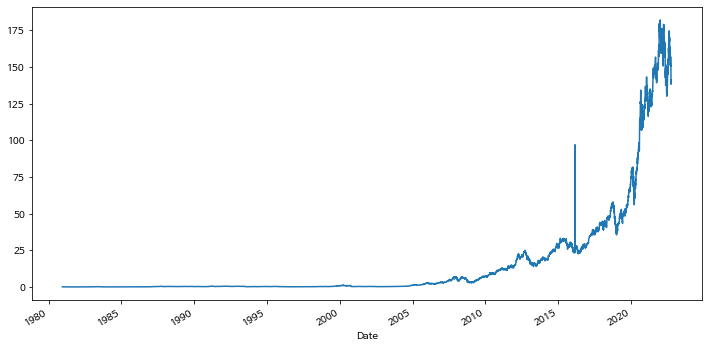

In [14]:
# APPL 애플 주가 (전기간) 받아서 그래프 그리기
_df = fdr.DataReader('AAPL')
_df['Close'].plot(figsize=(12,6))

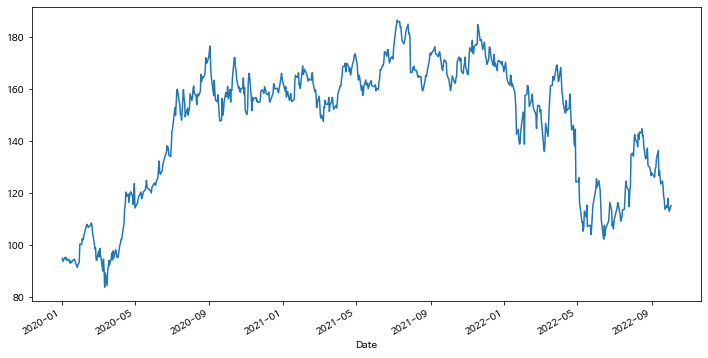

In [15]:
# AMZN 아마존 2020년 주가 받아서 그래프 그리기
df = fdr.DataReader('AMZN', '2020')
df['Close'].plot(figsize=(12,6));

### 3. 여러 종목 주가 받아오기

In [18]:
stock_list = [
  ["삼성전자", "005930"],
  ["SK하이닉스", "000660"],
  ["현대차", "005380"],
  ["셀트리온", "068270"],
  ["LG화학", "051910"],
  ["POSCO", "005490"],
  ["삼성물산", "028260"],
  ["NAVER", "035420"],
]

In [21]:
df_list = [fdr.DataReader(code, '2021-01-01', '2021-12-31')['Close'] for name, code in stock_list]
len(df_list)

8

In [22]:

# pd.concat()로 합치기
df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list] 
df.head(10)

,삼성전자,SK하이닉스,현대차,셀트리온,LG화학,POSCO,삼성물산,NAVER
Date,,,,,,,,
2021-01-04,83000,126000,207500,341065,889000,273000,144000,293000
2021-01-05,83900,130500,209500,347935,893000,285000,144500,292500
2021-01-06,82200,131000,203000,346954,890000,280000,139500,290000
2021-01-07,82900,134500,206000,350880,962000,291000,145000,289500
2021-01-08,88800,138000,246000,360204,999000,294500,151000,312000
2021-01-11,91000,133000,267500,367074,998000,284000,150500,309000
2021-01-12,90600,129000,261000,376889,962000,277000,145500,304000
2021-01-13,89700,133000,259000,374435,1000000,283500,146000,314000
2021-01-14,89700,130500,250500,345972,1010000,282000,152500,318000


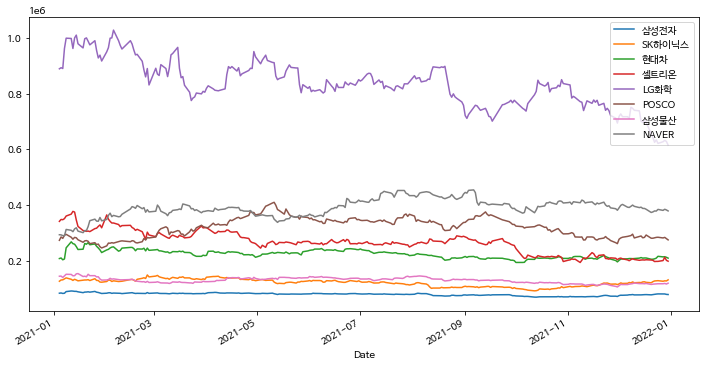

In [23]:
df.plot(figsize=(12,6));

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


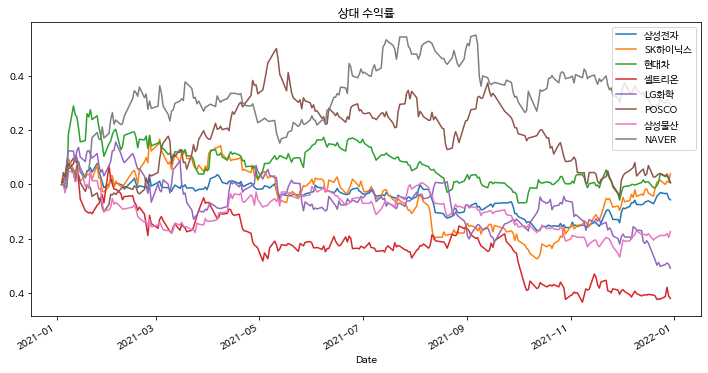

In [24]:
# 첫 날을 기준으로 상대 수익률 그려보기
df_norm = df / df.iloc[0] - 1
df_norm.plot(figsize=(12,6));
plt.title('상대 수익률');

In [25]:
df_norm.iloc[-1].sort_values(ascending=False)

NAVER     0.291809
SK하이닉스    0.039683
현대차       0.007229
POSCO     0.005495
삼성전자     -0.056627
삼성물산     -0.173611
LG화학     -0.308211
셀트리온     -0.419465
Name: 2021-12-30 00:00:00, dtype: float64

### 4. 시장 전체 종목 주가 받아오기

In [26]:
# 2020-01-01 부터  코스닥 전 종목 주가 가져오기
stock_list = kosdaq_list.loc[:,['Name', 'Symbol']].values.tolist()
stock_list

[['3S', '060310'],
 ['APS홀딩스', '054620'],
 ['AP시스템', '265520'],
 ['AP위성', '211270'],
 ['BNGT', '032790'],
 ['CBI', '013720'],
 ['CJ ENM', '035760'],
 ['CJ 바이오사이언스', '311690'],
 ['CJ프레시웨이', '051500'],
 ['CMG제약', '058820'],
 ['CNH', '023460'],
 ['CNT85', '056730'],
 ['CS', '065770'],
 ['CSA 코스믹', '083660'],
 ['DB금융스팩10호', '404950'],
 ['DB금융스팩8호', '367340'],
 ['DB금융스팩9호', '367360'],
 ['DMS', '068790'],
 ['DSC인베스트먼트', '241520'],
 ['EDGC', '245620'],
 ['EG', '037370'],
 ['ES큐브', '050120'],
 ['EV수성', '084180'],
 ['FSN', '214270'],
 ['GH신소재', '130500'],
 ['GRT', '900290'],
 ['GST', '083450'],
 ['HB솔루션', '297890'],
 ['HB테크놀러지', '078150'],
 ['HK이노엔', '195940'],
 ['HLB', '028300'],
 ['HLB생명과학', '067630'],
 ['HLB제약', '047920'],
 ['HLB테라퓨틱스', '115450'],
 ['HPSP', '403870'],
 ['HRS', '036640'],
 ['IBKS제12호스팩', '335870'],
 ['IBKS제13호스팩', '351340'],
 ['IBKS제16호스팩', '388790'],
 ['IBKS제17호스팩', '405350'],
 ['IBKS제18호스팩', '424760'],
 ['IBKS제19호스팩', '426550'],
 ['ISC', '095340'],
 ['ITX-AI', '099520'],
 [